### IMPORT LIBRARIES

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

###  Load Dataset & Data Review

In [50]:
#Load the dataset
df = pd.read_csv("telco_churn_cleaned.csv")

#Initial data review

# Show duplicate column names
duplicate_columns = df.columns[df.columns.duplicated()]
print("Duplicate Columns:\n", duplicate_columns)

# Drop duplicate columns (keep the first occurrence)
df = df.loc[:, ~df.columns.duplicated()]

df.info()
df.head()

Duplicate Columns:
 Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 76 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Customer ID                               7043 non-null   object 
 1   Country                                   7043 non-null   object 
 2   State                                     7043 non-null   object 
 3   City                                      7043 non-null   object 
 4   Zip Code                                  7043 non-null   int64  
 5   Gender                                    7043 non-null   int64  
 6   Partner                                   7043 non-null   int64  
 7   Dependents                                7043 non-null   int64  
 8   Tenure Months                             7043 non-null   int64  
 9   Phone Service                             7043 non-null   obj

,Customer ID,Country,State,City,Zip Code,Gender,Partner,Dependents,Tenure Months,Phone Service,...,Payment Method_Electronic check.1,Payment Method_Mailed check.1,Internet Type_DSL.1,Internet Type_Fiber Optic.1,Internet Type_None.1,Offer_Offer A.1,Offer_Offer B.1,Offer_Offer C.1,Offer_Offer D.1,Offer_Offer E.1
0,3668-QPYBK,United States,California,Los Angeles,90003,1,0,0,2,Yes,...,False,True,True,False,False,False,False,False,False,False
1,9237-HQITU,United States,California,Los Angeles,90005,0,0,1,2,Yes,...,True,False,False,True,False,False,False,False,False,False
2,9305-CDSKC,United States,California,Los Angeles,90006,0,0,1,8,Yes,...,True,False,False,False,False,False,False,False,False,False
3,7892-POOKP,United States,California,Los Angeles,90010,0,1,1,28,Yes,...,True,False,False,True,False,False,False,True,False,False
4,0280-XJGEX,United States,California,Los Angeles,90015,1,0,1,49,Yes,...,False,False,False,True,False,False,False,False,False,False


### Further Data Cleaning

In [52]:
# Drop irrelevant columns
df.drop(['Customer ID', 'ID', 'Zip Code'], axis=1, inplace=True, errors='ignore')

# Convert Total Charges to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)

# Encode target variable
df['Churn Value'] = df['Churn Value'].astype(int)

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)
df.head()

,Country,State,City,Gender,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Payment Method_Electronic check.1,Payment Method_Mailed check.1,Internet Type_DSL.1,Internet Type_Fiber Optic.1,Internet Type_None.1,Offer_Offer A.1,Offer_Offer B.1,Offer_Offer C.1,Offer_Offer D.1,Offer_Offer E.1
0,0,0,562,1,0,0,2,1,0,0,...,False,True,True,False,False,False,False,False,False,False
1,0,0,562,0,0,1,2,1,0,1,...,True,False,False,True,False,False,False,False,False,False
2,0,0,562,0,0,1,8,1,2,1,...,True,False,False,False,False,False,False,False,False,False
3,0,0,562,0,1,1,28,1,2,1,...,True,False,False,True,False,False,False,True,False,False
4,0,0,562,1,0,1,49,1,2,1,...,False,False,False,True,False,False,False,False,False,False


### Train/Test Split

In [30]:
X = df.drop(['Churn Value'], axis=1)
y = df['Churn Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Feature Scaling

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train Classifier

In [40]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

Confusion Matrix:
 [[1009    0]
 [   0  400]]
ROC AUC Score: 1.0


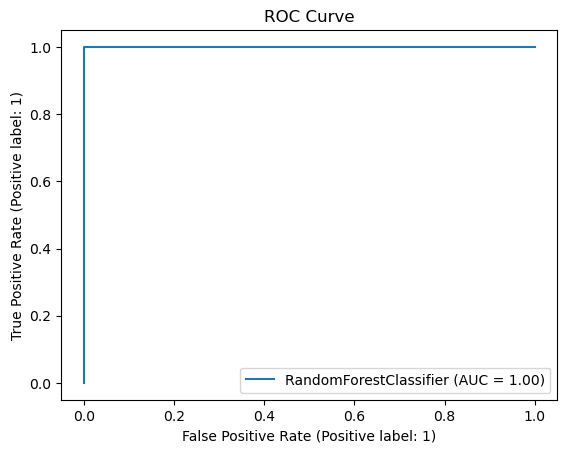

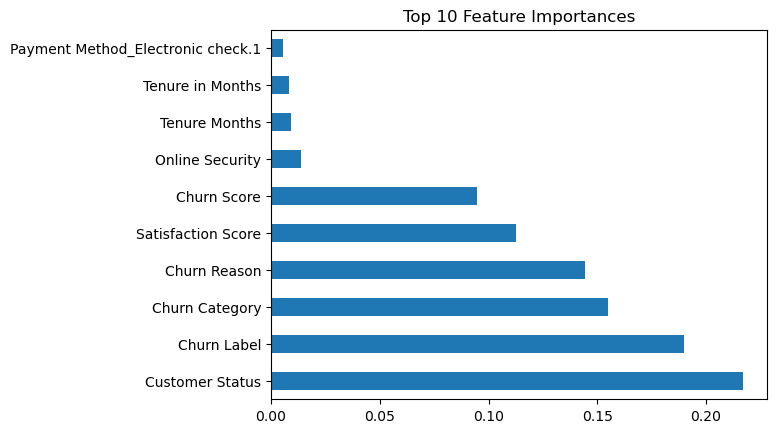

In [45]:
y_pred = model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]))

# Plot ROC Curve
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

# Plot Feature Importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()